In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
breast_cancer = pd.read_csv('breast-cancer.csv', header=None)
breast_cancer.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


In [3]:
# renaming the columns
total_cols = ['id', 'outcome', 'time', 'cell_1_radius', 'cell_1_texture', 'cell_1_perimiter',
              'cell_1_area', 'cell_1_smoothness', 'cell_1_compactness', 'cell_1_concavity',
              'cell_1_concave_points', 'cell_1_symmetry', 'cell_1_fractal_dimension',
              'cell_2_radius', 'cell_2_texture', 'cell_2_perimiter', 'cell_2_area',
              'cell_2_smoothness', 'cell_2_compactness', 'cell_2_concavity',
              'cell_2_concave_points', 'cell_2_symmetry', 'cell_2_fractal_dimension', 'cell_3_radius', 
              'cell_3_texture', 'cell_3_perimiter', 'cell_3_area', 'cell_3_smoothness',
              'cell_3_compactness', 'cell_3_concavity', 'cell_3_concave_points', 'cell_3_symmetry',
              'cell_3_fractal_dimension', 'tumor_size', 'lymph_status']
breast_cancer.columns = total_cols

In [4]:
# showing the results
breast_cancer.head(5)


,id,outcome,time,cell_1_radius,cell_1_texture,cell_1_perimiter,cell_1_area,cell_1_smoothness,cell_1_compactness,cell_1_concavity,...,cell_3_perimiter,cell_3_area,cell_3_smoothness,cell_3_compactness,cell_3_concavity,cell_3_concave_points,cell_3_symmetry,cell_3_fractal_dimension,tumor_size,lymph_status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


In [5]:
# isloating only the numerical data
numerics = breast_cancer._get_numeric_data()
numerics.head(5)

,id,time,cell_1_radius,cell_1_texture,cell_1_perimiter,cell_1_area,cell_1_smoothness,cell_1_compactness,cell_1_concavity,cell_1_concave_points,...,cell_3_texture,cell_3_perimiter,cell_3_area,cell_3_smoothness,cell_3_compactness,cell_3_concavity,cell_3_concave_points,cell_3_symmetry,cell_3_fractal_dimension,tumor_size
0,119513,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,0.07055,...,37.08,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0
1,8423,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0
2,842517,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,...,20.98,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5
3,843483,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0
4,843584,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5


In [6]:
# dropping two not relevant clolmns
numerics = numerics.drop(['id','time'], axis=1)

In [7]:
# making the split between the independent and target variable
X = numerics
y = breast_cancer["outcome"]

In [26]:
# turnig the cathegorical target varable into a numerical one
y.replace('N',1,inplace=True)
y.replace('R',0,inplace=True)

In [33]:
y

0      1
1      1
2      1
3      1
4      0
      ..
193    1
194    1
195    1
196    0
197    1
Name: outcome, Length: 198, dtype: int64

In [34]:
# scaling the data and splitting it into train and test before PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
# X_test  = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns = X.columns)
# X_test  = pd.DataFrame(X_test , columns = X.columns)

In [35]:
X_train.shape

(138, 31)

### Performing PCA

In [36]:
# performing the PCA, first the constructor and then fit the model with it
from sklearn.decomposition import PCA

pca = PCA(svd_solver='full')

pca.fit(X_train)

X_train = pca.transform(X_train)
X_test  = pca.transform(X_test)

cols = [ 'PCA_' + str(i) for i in list(range(1,len(X.columns)+1))]

X_train = pd.DataFrame(X_train, columns = cols)
X_test  = pd.DataFrame(X_test , columns = cols)

#X_train = pd.DataFrame(X_train, columns = X.columns)
#X_test  = pd.DataFrame(X_test , columns = X.columns)

In [37]:
X_train.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,...,PCA_22,PCA_23,PCA_24,PCA_25,PCA_26,PCA_27,PCA_28,PCA_29,PCA_30,PCA_31
0,-3.197488,1.476132,1.290654,-0.355745,-0.314906,0.269150,-0.874209,0.425475,0.579369,0.443670,...,-0.018735,-0.077436,0.049709,-0.069662,-0.066862,-0.023456,0.016067,0.002150,-0.009673,0.001653
1,1.579337,5.321232,-2.193336,3.937252,1.564167,1.543118,-0.667780,0.333445,0.988435,-1.723567,...,0.343442,-0.616081,-0.187019,-0.019792,0.087769,0.194774,-0.068739,0.061091,0.000694,-0.004381
2,-2.458448,3.942353,-1.486197,-0.984788,-0.893966,-0.409313,-0.187518,0.482879,-0.387720,-0.382506,...,-0.138879,-0.032876,0.144515,-0.047344,-0.074591,0.161063,-0.021178,-0.013332,-0.035005,0.002615
3,-3.368063,2.352554,-1.400432,-0.655397,-0.392808,1.246581,-0.628338,-0.250567,-0.002290,-1.182124,...,0.211804,-0.053580,-0.007302,0.205141,-0.140185,-0.184210,0.074944,0.048570,-0.034422,0.022047
4,-0.476516,1.233715,-2.401913,-1.152940,-1.412718,0.556343,-0.092931,1.408967,0.601764,-0.805294,...,0.066976,-0.047634,0.054841,0.015828,0.024883,-0.129238,-0.037645,0.014608,-0.055915,-0.006770


In [38]:
# identifying how many principal components we need via getting underlying variance
print(pca.explained_variance_ratio_) # Individual variances of each principal components
#print(pca.singular_values_)

[3.31661305e-01 2.49324986e-01 1.09352369e-01 6.82674577e-02
 4.67130312e-02 4.12540649e-02 3.00949735e-02 2.71658870e-02
 2.09436303e-02 1.74950457e-02 1.17772229e-02 1.07936917e-02
 8.56683449e-03 6.01042064e-03 4.01689715e-03 3.39383954e-03
 2.52921856e-03 2.31828169e-03 1.69630180e-03 1.40084577e-03
 1.17052327e-03 9.39276299e-04 8.04918584e-04 7.32410741e-04
 5.67358896e-04 4.12878638e-04 3.59688265e-04 1.29941284e-04
 6.95397705e-05 2.69394660e-05 1.02204779e-05]


In [39]:
# putting the above array into a list
variances = pca.explained_variance_ratio_.tolist()

In [40]:
# showing the first two (co-)variances vs. the target value from the above list
variances[:2]

[0.33166130542432787, 0.2493249855853665]

In [41]:
# creating a table with the above (co-)variances first aboslute and 2nd accumulated
total_variance = [sum(variances[:i]) for i in range(1, len(variances)+1)]
scree = pd.DataFrame({'num_pca': range(1,len(variances)+1),'variance': variances,'cum_variance': total_variance})
scree.head(6)

,num_pca,variance,cum_variance
0,1,0.331661,0.331661
1,2,0.249325,0.580986
2,3,0.109352,0.690339
3,4,0.068267,0.758606
4,5,0.046713,0.805319
5,6,0.041254,0.846573


<AxesSubplot:xlabel='num_pca', ylabel='cum_variance'>

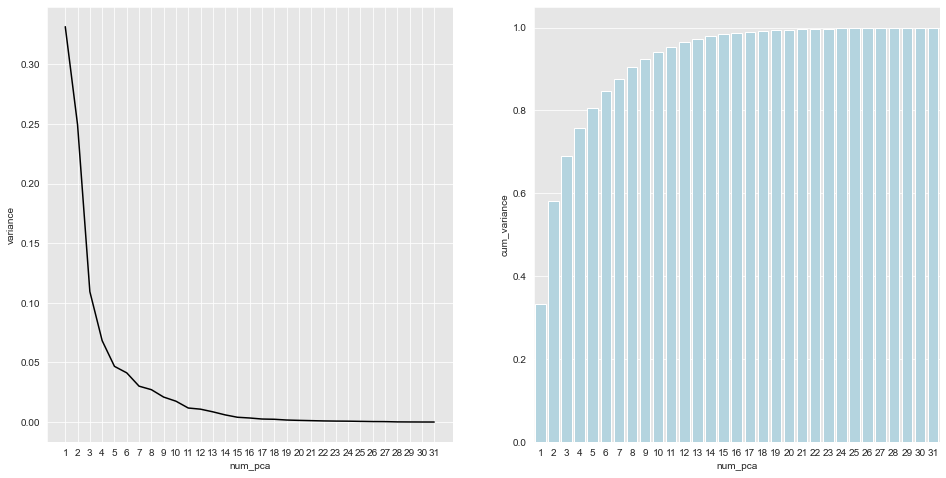

In [42]:
# visualizing the above table to decide on the optimal amount of prin. components
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("darkgrid", {"axes.facecolor": ".9"})

fig, ax = plt.subplots(1,2,figsize=(16,8))

sns.lineplot(x="num_pca", y="variance", data=scree, ax = ax[0], color = 'black')
ax[0].set_xticks(range(1,32))
sns.barplot(x="num_pca", y="cum_variance", data=scree, ax = ax[1], color = 'lightblue')

Isolating the optimal amount of principle components:

Accoring to a rule of thumb if you have 80% variance reached that is fine
We see that this is possible with the "best" 5 principle components
Cum_variance[5] = 0.805 -> explain 80.5% of the variablity in the data


### Getting the PCA coefficients

In [43]:
pca.components_

array([[ 2.00324717e-01, -8.81192470e-03,  2.17559428e-01,
         2.03567616e-01,  1.37613634e-01,  2.48579188e-01,
         2.78137376e-01,  2.80033067e-01,  1.61121200e-01,
         1.06757075e-01,  2.34021362e-01,  8.91854310e-02,
         2.43234718e-01,  2.41098001e-01,  1.02067187e-01,
         1.91163326e-01,  2.12350711e-01,  1.87416648e-01,
         1.53998611e-01,  1.66027281e-01,  1.96974401e-01,
        -5.23857229e-02,  2.20414660e-01,  1.92739685e-01,
         3.47461028e-02,  1.30890190e-01,  1.82184339e-01,
         2.29568646e-01,  6.57816817e-02,  5.18731533e-02,
         1.26275247e-02],
       [-2.54892088e-01, -3.88411606e-02, -2.36443689e-01,
        -2.52262662e-01,  2.18288179e-01,  1.72661964e-01,
         6.83825557e-02, -2.18378212e-02,  1.87847862e-01,
         2.97852445e-01, -1.19648955e-01,  2.86932857e-02,
        -1.02362071e-01, -1.57153980e-01,  8.29087365e-02,
         1.80664069e-01,  1.17104058e-01,  3.44416877e-02,
         1.28801536e-01,  1.98

In [44]:
# This is the Eigenvector of the first feature in the data set
pca.components_[0,:]
# the highest coefficent here is 0.2800

array([ 0.20032472, -0.00881192,  0.21755943,  0.20356762,  0.13761363,
        0.24857919,  0.27813738,  0.28003307,  0.1611212 ,  0.10675707,
        0.23402136,  0.08918543,  0.24323472,  0.241098  ,  0.10206719,
        0.19116333,  0.21235071,  0.18741665,  0.15399861,  0.16602728,
        0.1969744 , -0.05238572,  0.22041466,  0.19273968,  0.0347461 ,
        0.13089019,  0.18218434,  0.22956865,  0.06578168,  0.05187315,
        0.01262752])

In [45]:
# making hte above more readable (cell nr. 18)
for comp in range(1,len(pca.components_)+1):
    print("Principal component ",comp)
    my_list = [(abs(value),index+1,X.columns[index],value) for index,value in enumerate(pca.components_[comp-1,:]) ]
    my_list.sort(reverse=True)
    my_list = [(elem[1],elem[2],round(elem[3],2)) for elem in my_list]
    print(my_list)
    print()

# Principal component 1 has the highest coefficient with feature Nr. 8 having a value of 0.28% variance description power.    

Principal component  1
[(8, 'cell_1_concave_points', 0.28), (7, 'cell_1_concavity', 0.28), (6, 'cell_1_compactness', 0.25), (13, 'cell_2_perimiter', 0.24), (14, 'cell_2_area', 0.24), (11, 'cell_2_radius', 0.23), (28, 'cell_3_concave_points', 0.23), (23, 'cell_3_perimiter', 0.22), (3, 'cell_1_perimiter', 0.22), (17, 'cell_2_concavity', 0.21), (4, 'cell_1_area', 0.2), (1, 'cell_1_radius', 0.2), (21, 'cell_3_radius', 0.2), (24, 'cell_3_area', 0.19), (16, 'cell_2_compactness', 0.19), (18, 'cell_2_concave_points', 0.19), (27, 'cell_3_concavity', 0.18), (20, 'cell_2_fractal_dimension', 0.17), (9, 'cell_1_symmetry', 0.16), (19, 'cell_2_symmetry', 0.15), (5, 'cell_1_smoothness', 0.14), (26, 'cell_3_compactness', 0.13), (10, 'cell_1_fractal_dimension', 0.11), (15, 'cell_2_smoothness', 0.1), (12, 'cell_2_texture', 0.09), (29, 'cell_3_symmetry', 0.07), (22, 'cell_3_texture', -0.05), (30, 'cell_3_fractal_dimension', 0.05), (25, 'cell_3_smoothness', 0.03), (31, 'tumor_size', 0.01), (2, 'cell_1_text

### Generating a regression model with the PCA¶

In [46]:
# PCA is only a preparation to optimize linear regression -> we use 5 princ. components
# WE ARE NOT TELLING THE MODEL WE USE 5 PRINCIPLE COMPONENTS!!!!!
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker

def show_errors(y_real_train, y_pred_train, y_real_test, y_pred_test):

    plt.style.use('seaborn') 

    fig, ax = plt.subplots(2,2,figsize=(10,10))
    
    ax[0,0].scatter(x = np.exp(y_real_train), y = np.exp(y_pred_train), c = 'green')
    ax[0,0].plot([0,700000], [0,700000], linestyle = '--',c = 'black')
    ax[0,0].set_xlim(0,700000)
    ax[0,0].set_ylim(0,700000)

    ax[0,0].xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{int(x/1000)}K'))
    ax[0,0].yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{int(x/1000)}K'))
    ax[0,0].set_title('Train set')

    ax[0,1].hist(x = np.exp(y_real_train)-np.exp(y_pred_train), bins = 50,color = 'green')
    ax[0,1].set_xlim(-200000,200000)
    ax[0,1].xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{int(x/1000)}K'))
    ax[0,1].set_title('Train set')

    ax[1,0].scatter(x = np.exp(y_real_test), y = np.exp(y_pred_test), c = 'blue')
    ax[1,0].plot([0,700000], [0,700000], linestyle = '--',c = 'black')
    ax[1,0].set_xlim(0,700000)
    ax[1,0].set_ylim(0,700000)
    ax[1,0].xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{int(x/1000)}K'))
    ax[1,0].yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{int(x/1000)}K'))
    ax[1,0].set_title('Test set')   

    ax[1,1].hist(x = np.exp(y_real_test)-np.exp(y_pred_test), bins = 50,color = 'blue')
    ax[1,1].set_xlim(-200000,200000)
    ax[1,1].xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{int(x/1000)}K'))
    ax[1,1].set_title('Test set')

    fig.tight_layout()
    pass

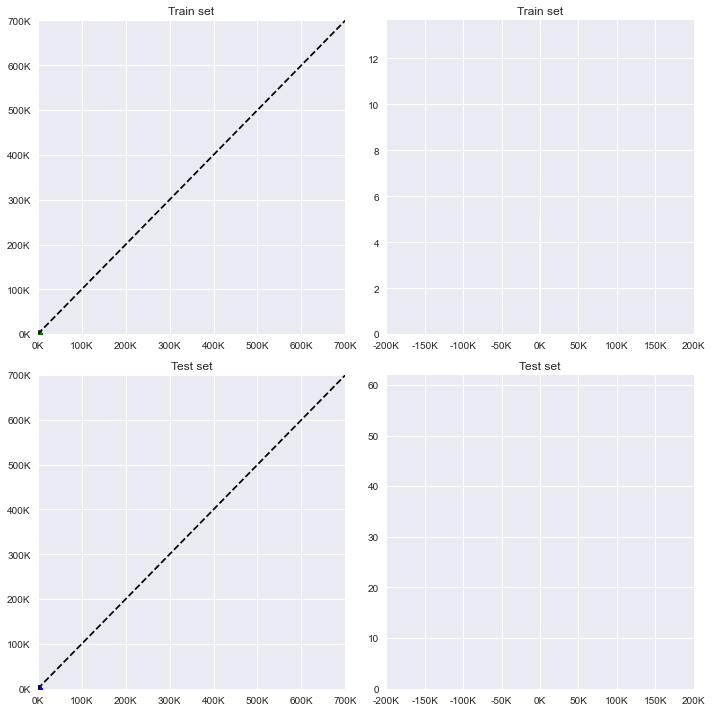

In [47]:
# plotting the results of the regression analysis
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train,y_train)

y_pred_train = lm.predict(X_train)
y_pred_test  = lm.predict(X_test)

show_errors(y_train, y_pred_train, y_test, y_pred_test)